# Auswertung 200218_5

### imports

In [1]:
import sys
sys.path.append("../toolbox/")
from workflow  import *

In [2]:
%load_ext autoreload

In [3]:
%autoreload

## define master data

In [4]:
measurement_id = "200218_5"
campaign_id    = "01_Messkampagne_1"
path_to_raw_data_folder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
path_to_hdf5_folder = "HDF5"

In [5]:
rawfolder, hdf5file = paths(measurement_id, campaign_id, path_to_raw_data_folder, path_to_hdf5_folder)

### import data

In [6]:
traceName = "Trace"
pulseMin = None
pulseMax = None


C1 = readChannel("C1", rawfolder, traceName, pulseMin, pulseMax)
C3 = readChannel("C3", rawfolder, traceName, pulseMin, pulseMax)

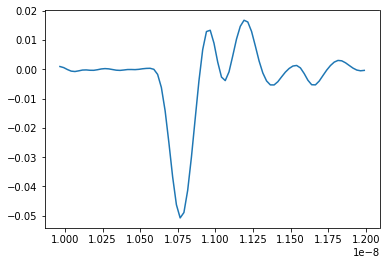

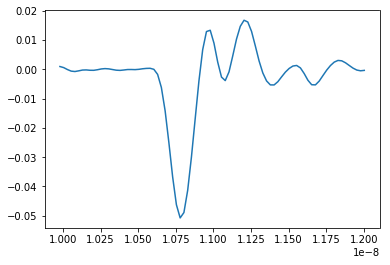

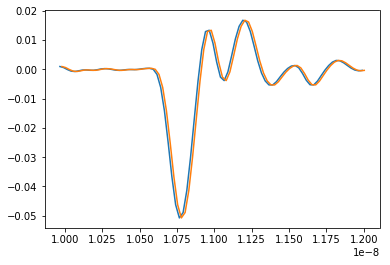

In [7]:
pulsnr = 123
viewImport(C1, C3, pulsnr)

### define area of interest

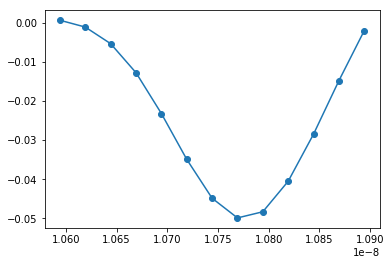

In [8]:
areaMinC1 = 25
areaMaxC1 = 38
pulsnr = 125

viewSelection(C1, pulsnr, areaMinC1, areaMaxC1)

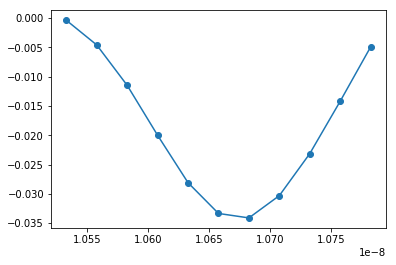

In [10]:
areaMinC3 = 22
areaMaxC3 = 33
pulsnr = 125

viewSelection(C3, pulsnr, areaMinC3, areaMaxC3)

## algorithm 1: fit gaussian function

In [11]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-11, 1.078e-8, 5e-11]
gaussParamsC3 = [-1.0e-11, 1.07e-8, 5e-11]

In [12]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)

In [13]:
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

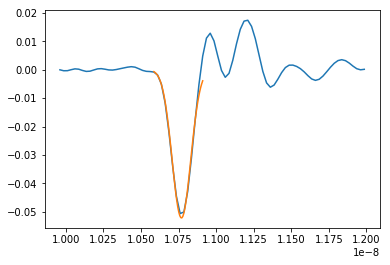

parameter: [-8.12964051e-12  1.07694067e-08  6.20754449e-11] [A, mu, sigma]


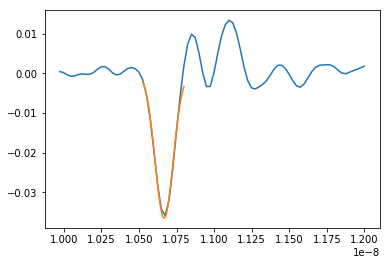

parameter: [-5.48549937e-12  1.06676496e-08  6.00179408e-11] [A, mu, sigma]


In [14]:
pulsnr = 125

viewFit(C1, pulsnr, areaMinC1, areaMaxC1, gaussParamsC1)
viewFit(C3, pulsnr, areaMinC3, areaMaxC3, gaussParamsC3)

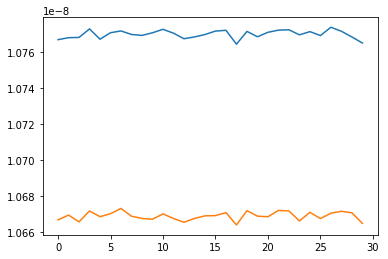

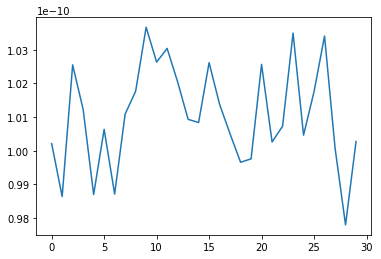

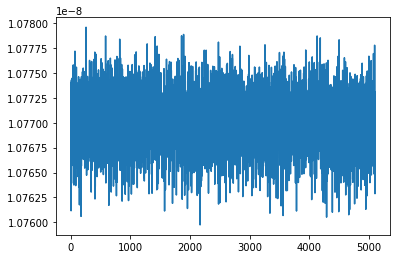

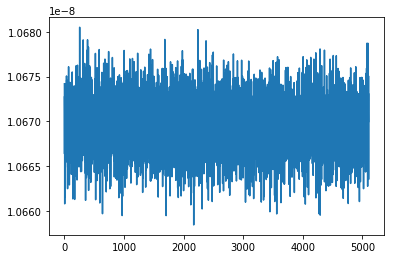

In [15]:
pulseMin = 100
pulseMax = 130

viewMu(C1, C3, pulseMin, pulseMax)

### histogram

In [16]:
JitterGauss = jitter(C1, C3, axis = 1)

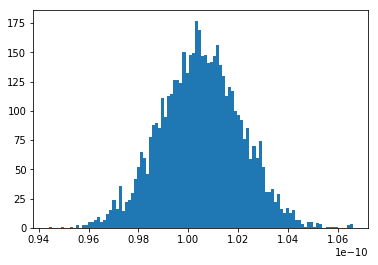

In [17]:
bins = 100

HistGauss = histogram(JitterGauss, bins)

### fit gauss to histogram

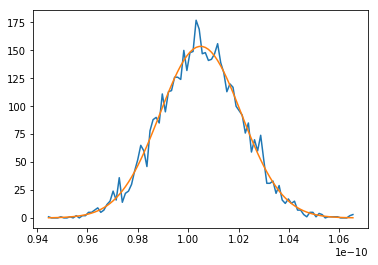

parameter: [6.23679798e-10 1.00494341e-10 1.61933488e-12] [A, mu, sigma]


In [18]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1.01e-10, 1e-12]

HistFitParamsGauss = fitSingle(np.array([HistGauss[0], HistGauss[1]]), None, None, gaussParamsHist)

### result GAUSSFIT

In [19]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsGauss)

σ_0: 1.6193348804107426 ps
σ_1: 1.145042674950343 ps
σ_1 = σ_0 / sqrt(2)

μ: 100.49434147497783 ps

coma separated [σ_0, σ_1, μ]
1.6193348804107426e-12,1.145042674950343e-12,1.0049434147497783e-10

 tab separated [σ_0, σ_1, μ]
1.6193348804107426e-12	1.145042674950343e-12	1.0049434147497783e-10


## algorithm 2: min

In [20]:
C1["min"] = minChannel(C1)
C3["min"] = minChannel(C3)

## algorithm 3: threshold

In [21]:
factor = 0.5

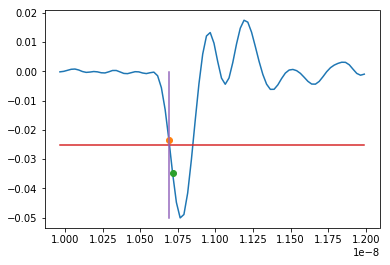

xt: 1.0693726504643686e-08 ps, yt -0.02506469023637692 ps


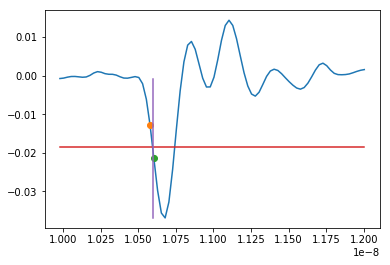

xt: 1.0594859750864538e-08 ps, yt -0.018425960033709998 ps


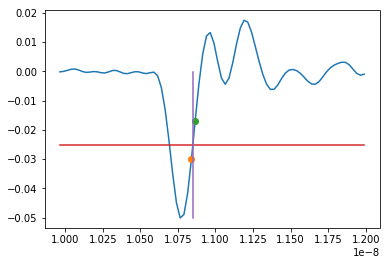

xt: 1.0849671797523326e-08 ps, yt -0.02506469023637692 ps


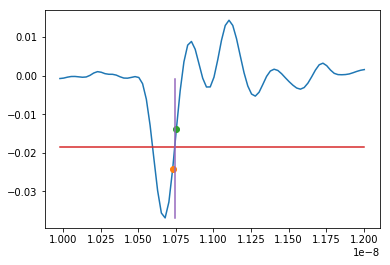

xt: 1.0742478381107729e-08 ps, yt -0.018425960033709998 ps


In [22]:
C1["thres5f"] = threshold(C1, factor, show=120)
C3["thres5f"] = threshold(C3, factor, show=120)
C1["thres5r"] = threshold(C1, factor, fallingEdge = False, show=120)
C3["thres5r"] = threshold(C3, factor, fallingEdge = False, show=120)

In [23]:
C1["thres5c"] = (C1["thres5r"] + C1["thres5f"]) / 2
C3["thres5c"] = (C3["thres5r"] + C3["thres5f"]) / 2

### histogram

In [24]:
JitterThres5f = jitter(C1, C3, storage = "thres5f", axis = 0)
JitterThres5c = jitter(C1, C3, storage = "thres5c", axis = 0)
JitterThres5r = jitter(C1, C3, storage = "thres5r", axis = 0)

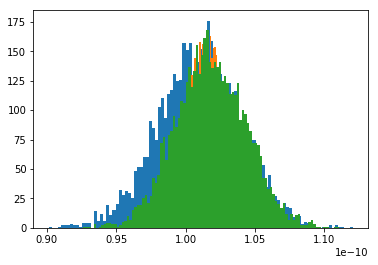

In [25]:
bins = 100

HistThres5f = histogram(JitterThres5f, bins)
HistThres5c = histogram(JitterThres5c, bins)
HistThres5r = histogram(JitterThres5r, bins)

### fit gauss to histogram

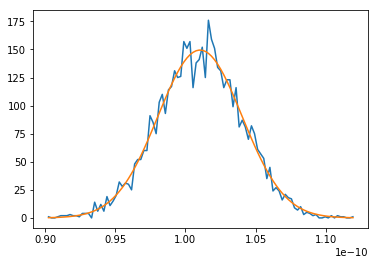

parameter: [1.12143970e-09 1.01042436e-10 2.99324152e-12] [A, mu, sigma]


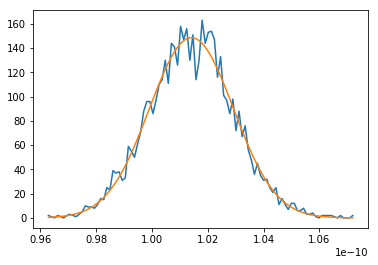

parameter: [5.61577231e-10 1.01412279e-10 1.50701167e-12] [A, mu, sigma]


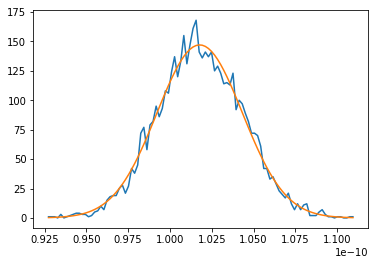

parameter: [9.41873204e-10 1.01775636e-10 2.55547080e-12] [A, mu, sigma]


In [26]:
# [A, mu, sigma]
gaussParamsThres5f = [1e-9, 1.01e-10, 1e-12]
gaussParamsThres5c = [1e-9, 1.02e-10, 1e-12]
gaussParamsThres5r = [1e-9, 1.01e-10, 1e-12]

HistFitParamsThres5f = fitSingle(np.array([HistThres5f[0], HistThres5f[1]]), None, None, gaussParamsThres5f)
HistFitParamsThres5c = fitSingle(np.array([HistThres5c[0], HistThres5c[1]]), None, None, gaussParamsThres5c)
HistFitParamsThres5r = fitSingle(np.array([HistThres5r[0], HistThres5r[1]]), None, None, gaussParamsThres5r)

### result

In [28]:
print("-- THRESHOLD 50% FALLING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5f)

print("\n--------------------------\n\n-- THRESHOLD 50% CENTER --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5c)

print("\n-------------------------------\n\n-- THRESHOLD 50% RISING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5r)

-- THRESHOLD 50% FALLING EDGE --
σ_0: 2.993241524084788 ps
σ_1: 2.11654137940951 ps
σ_1 = σ_0 / sqrt(2)

μ: 101.04243599896832 ps

coma separated [σ_0, σ_1, μ]
2.9932415240847876e-12,2.1165413794095098e-12,1.0104243599896832e-10

 tab separated [σ_0, σ_1, μ]
2.9932415240847876e-12	2.1165413794095098e-12	1.0104243599896832e-10

--------------------------

-- THRESHOLD 50% CENTER --
σ_0: 1.5070116655427759 ps
σ_1: 1.06561816803253 ps
σ_1 = σ_0 / sqrt(2)

μ: 101.41227890534991 ps

coma separated [σ_0, σ_1, μ]
1.5070116655427758e-12,1.06561816803253e-12,1.014122789053499e-10

 tab separated [σ_0, σ_1, μ]
1.5070116655427758e-12	1.06561816803253e-12	1.014122789053499e-10

-------------------------------

-- THRESHOLD 50% RISING EDGE --
σ_0: 2.55547080355003 ps
σ_1: 1.8069907343144618 ps
σ_1 = σ_0 / sqrt(2)

μ: 101.77563644106976 ps

coma separated [σ_0, σ_1, μ]
2.55547080355003e-12,1.8069907343144618e-12,1.0177563644106976e-10

 tab separated [σ_0, σ_1, μ]
2.55547080355003e-12	1.806990734314